In [2]:
!pip install torch torchvision matplotlib

  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.6.1.9-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.3.1.170-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl (363.4 MB)
Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl (13.8 MB)
Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl (664.8 MB)
Using cached nvidia_cusolver_cu12-11.6.1.9-py3-none-manylinux2014_x86_64.whl (127.9 MB)
Using cached nvidia_cusparse_cu12-12.3.1.170-py3-none-manylinux2014_x86_64.whl (207.5 MB)
  Attempting uninstall: nvidia-cusparse-cu12
    Found existing installation: 

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [20]:
transform = transforms.ToTensor()
train_ds = datasets.MNIST('data/', train=True,  download=True, transform=transform)
test_ds  = datasets.MNIST('data/', train=False, download=True, transform=transform)
train_loader = DataLoader(train_ds, batch_size=64, shuffle=True)
test_loader  = DataLoader(test_ds, batch_size=64, shuffle=False)

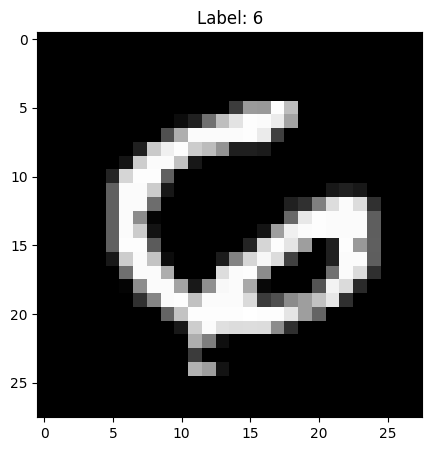

In [21]:
imgs, labels = next(iter(train_loader))
plt.figure(figsize=(5,5))
plt.imshow(imgs[0].squeeze(), cmap='gray')
plt.title(f'Label: {labels[0]}')
plt.show()


In [22]:
class MNISTModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)
model = MNISTModel()


In [24]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)


In [35]:
loss_history = []
epochs = 5
epoch_losses = []

for epoch in range(epochs):
    running_loss = 0
    for imgs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(imgs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        loss_history.append(loss.item())
        running_loss += loss.item()
    epoch_loss = running_loss / len(train_loader)
    epoch_losses.append(epoch_loss)
    print(f'Epoch {epoch+1}/{epochs} — Loss: {running_loss/len(train_loader):.4f}')


Epoch 1/5 — Loss: 0.0201
Epoch 2/5 — Loss: 0.0187
Epoch 3/5 — Loss: 0.0136
Epoch 4/5 — Loss: 0.0156
Epoch 5/5 — Loss: 0.0132


In [36]:
torch.save(model.state_dict(), 'mnist_model.pth')

In [37]:
model.eval()
correct = total = 0
with torch.no_grad():
    for imgs, labels in test_loader:
        preds = model(imgs).argmax(dim=1)
        correct += (preds == labels).sum().item()
        total   += labels.size(0)
print(f'Test Accuracy: {100 * correct/total:.2f}%')


Test Accuracy: 97.36%


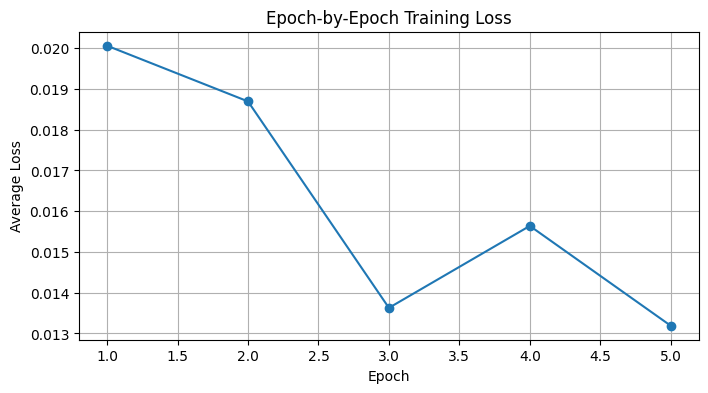

In [39]:
plt.figure(figsize=(8,4))
plt.plot(range(1, epochs+1), epoch_losses, marker='o')
plt.xlabel("Epoch")
plt.ylabel("Average Loss")
plt.title("Epoch-by-Epoch Training Loss")
plt.grid(True)
plt.show()
torch.save(model.state_dict(), 'mnist_model.pth')
